<a href="https://colab.research.google.com/github/jyoshnakonidala11/SOURCE-CODE-DATA-SET-2-/blob/main/Data_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3137510598.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)


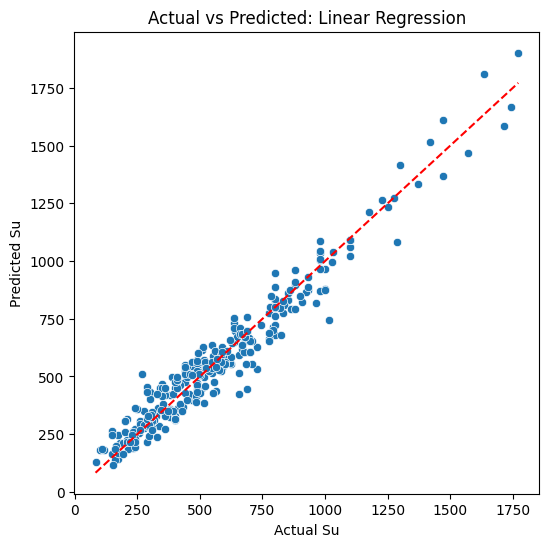

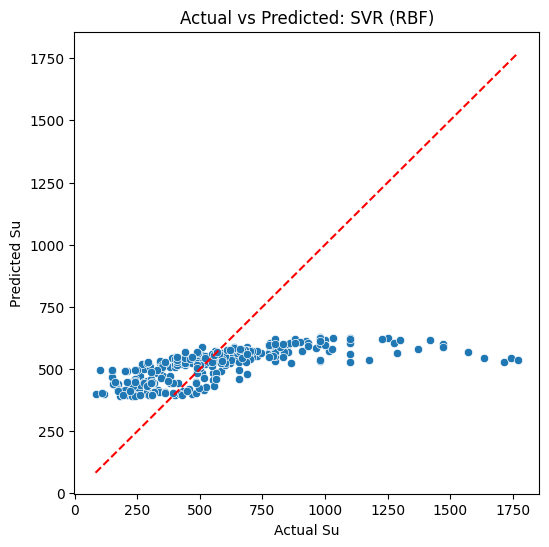

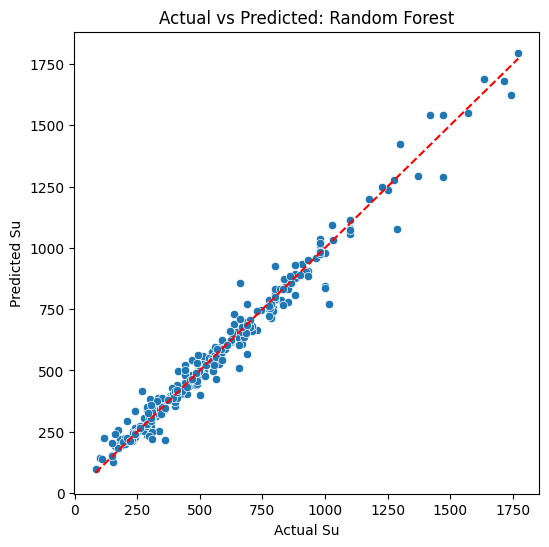

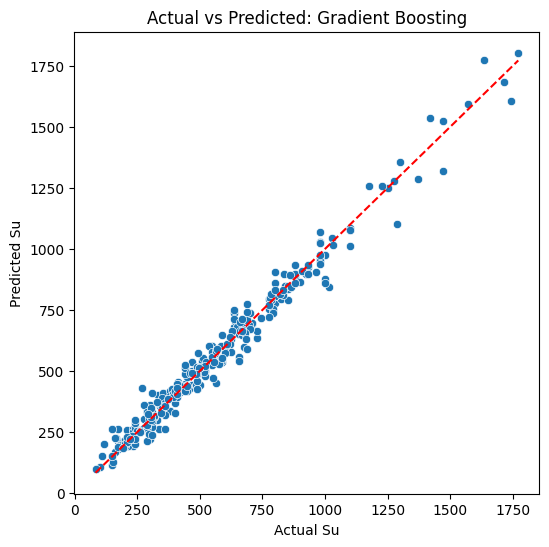

Model Comparison Table:
               Model         MAE        RMSE        R²
3  Gradient Boosting   33.671045   46.801407  0.977489
2      Random Forest   29.950048   47.413981  0.976896
0  Linear Regression   56.452714   72.808197  0.945520
1          SVR (RBF)  194.196702  273.658272  0.230345


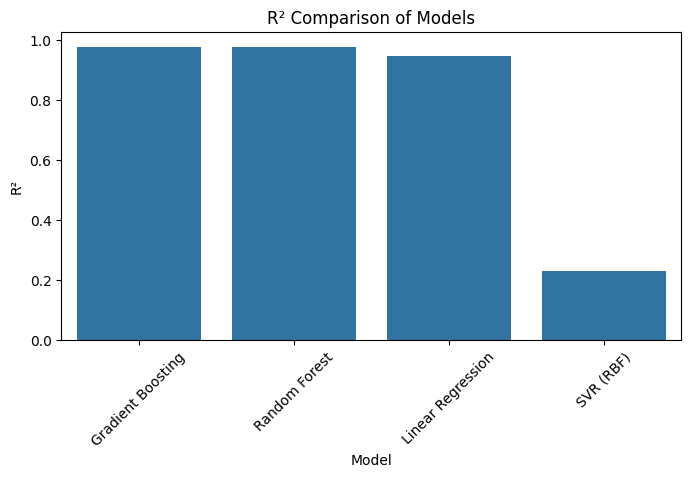

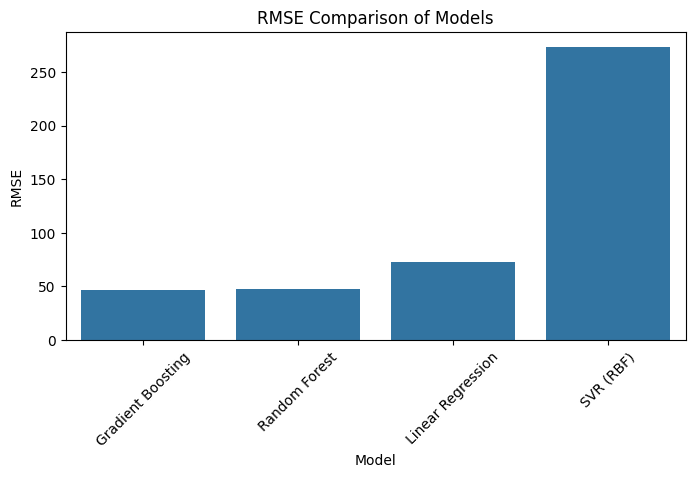

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Data.csv')

cat_cols = ['Std','Material','Heat treatment','Desc']
for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

# Remove ' max' from 'Sy' column and convert to numeric, coercing errors to NaN
df['Sy'] = df['Sy'].astype(str).str.replace(' max', '', regex=False)
df['Sy'] = pd.to_numeric(df['Sy'], errors='coerce')

# Drop rows with NaN in 'Sy' if necessary, or impute
df.dropna(subset=['Sy'], inplace=True)

X = df.drop(columns=['Su','ID'], errors='ignore')
y = df['Su']

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Impute missing values in numerical columns
for col in num_cols:
    if X[col].isnull().any():
        X[col].fillna(X[col].mean(), inplace=True)

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "SVR (RBF)": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2
    })
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Su")
    plt.ylabel("Predicted Su")
    plt.title(f"Actual vs Predicted: {name}")
    plt.show()

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("Model Comparison Table:")
print(results_df)

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="R²", data=results_df)
plt.title("R² Comparison of Models")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("RMSE Comparison of Models")
plt.xticks(rotation=45)
plt.show()